# Explore here

1 # EXPLORACIÓN DE LOS DATOS

In [2]:
# Your code here
import pandas as pd

URL= "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

total_data = pd.read_csv(URL)
total_data.drop(columns = ["id"], inplace = True)
total_data.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
total_data.shape

(48895, 15)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month               


Tipos de datos por columnas: decimales (3), númericos (6) y objetos (6)
- Hay un total de  48895 filas (en este caso, pisos) y 14 columnas, entre las que encontramos el objetivo o clase a predecir, `price`.
- Las variables `Last_Review` y `reviews_per_moth`  contienen 10.052 valores nulos.El 20% del total de los valores

2 # ELIMINAR DUPLICADOS

In [5]:
total_data.duplicated().sum()

np.int64(0)

No aparecen filas con valores duplicados

In [6]:
#total_data.drop("columna que desamos eliminar del análisis de duplicados", axis = 1).duplicated().sum()
#En este caso ya se eliminó el "Index", valor que podría estár mal generado y confundir en el análisis de duplicados

In [7]:
#total_data = total_data.drop_duplicates(subset = total_data.columns.difference([''])) # en caso de tener duplicados los borramos
print(total_data.shape)
total_data.head()

(48895, 15)


,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


3 # ELIMINAR INFORMACIÓN IRRELEVANTE

In [8]:
total_data.drop(["name", "host_id", "host_name","latitude","longitude"], axis = 1, inplace = True)

total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


4 # ANALISIS DE VARIABLES

VARIABLES CATEGÓRICAS

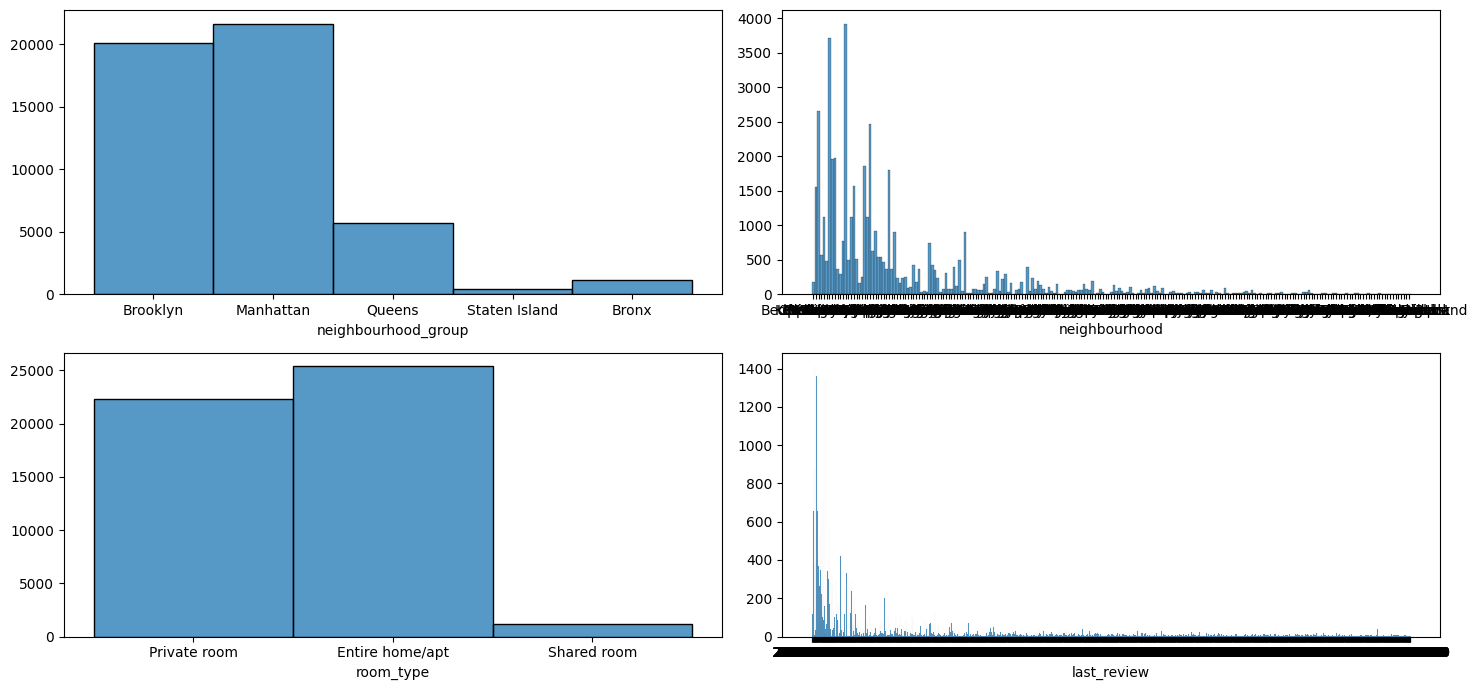

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

# Create a multiple histogram

sns.histplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group").set(ylabel = None)
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(ylabel = None)
sns.histplot(ax = axis[1, 0], data = total_data, x = "room_type").set(ylabel = None)
sns.histplot(ax = axis[1, 1], data = total_data, x = "last_review").set(ylabel = None) # preguntar como pasar valores de x a fechas o hacer zoom para ver por más recientes


# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

VARIABLES NUMÉRICAS

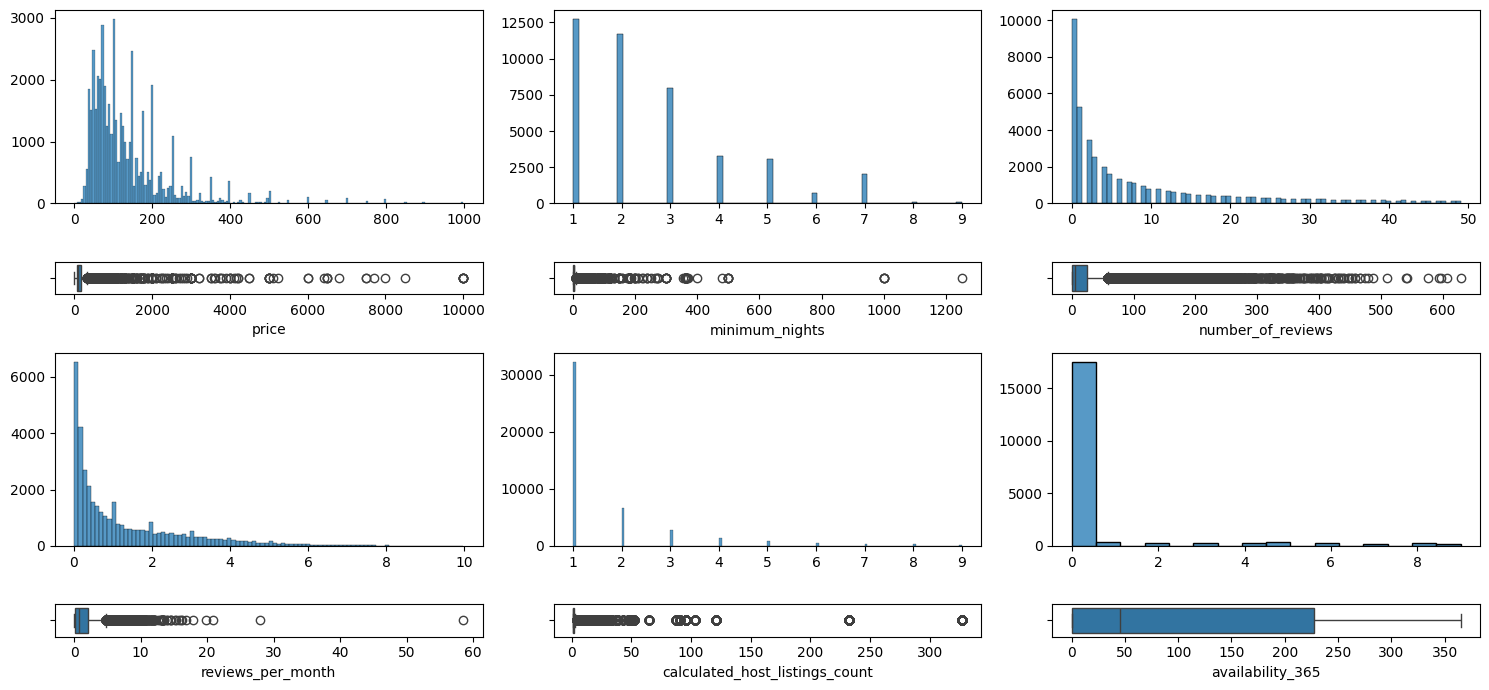

In [10]:
fig, axis = plt.subplots(4, 3, figsize = (15, 7), gridspec_kw={'height_ratios': [6,1,6,1]})


# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axis[0, 0], data = total_data[total_data['price']<1000], x = "price").set(xlabel = None,ylabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data[total_data['minimum_nights']<10], x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = total_data[total_data["number_of_reviews"]<50], x = "number_of_reviews").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = total_data, x = "number_of_reviews")
sns.histplot(ax = axis[2, 0], data = total_data[total_data['reviews_per_month']<10], x = "reviews_per_month").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 0], data = total_data, x = "reviews_per_month")
sns.histplot(ax = axis[2, 1], data = total_data[total_data['calculated_host_listings_count']<10], x = "calculated_host_listings_count").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")
sns.histplot(ax = axis[2, 2], data = total_data[total_data["availability_365"]<10], x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[3, 2], data = total_data, x = "availability_365")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

ANALIZAR NUESTRA VARIABLE 'PRECIO' EN RELACIÓN A TODAS LAS DEMÁS

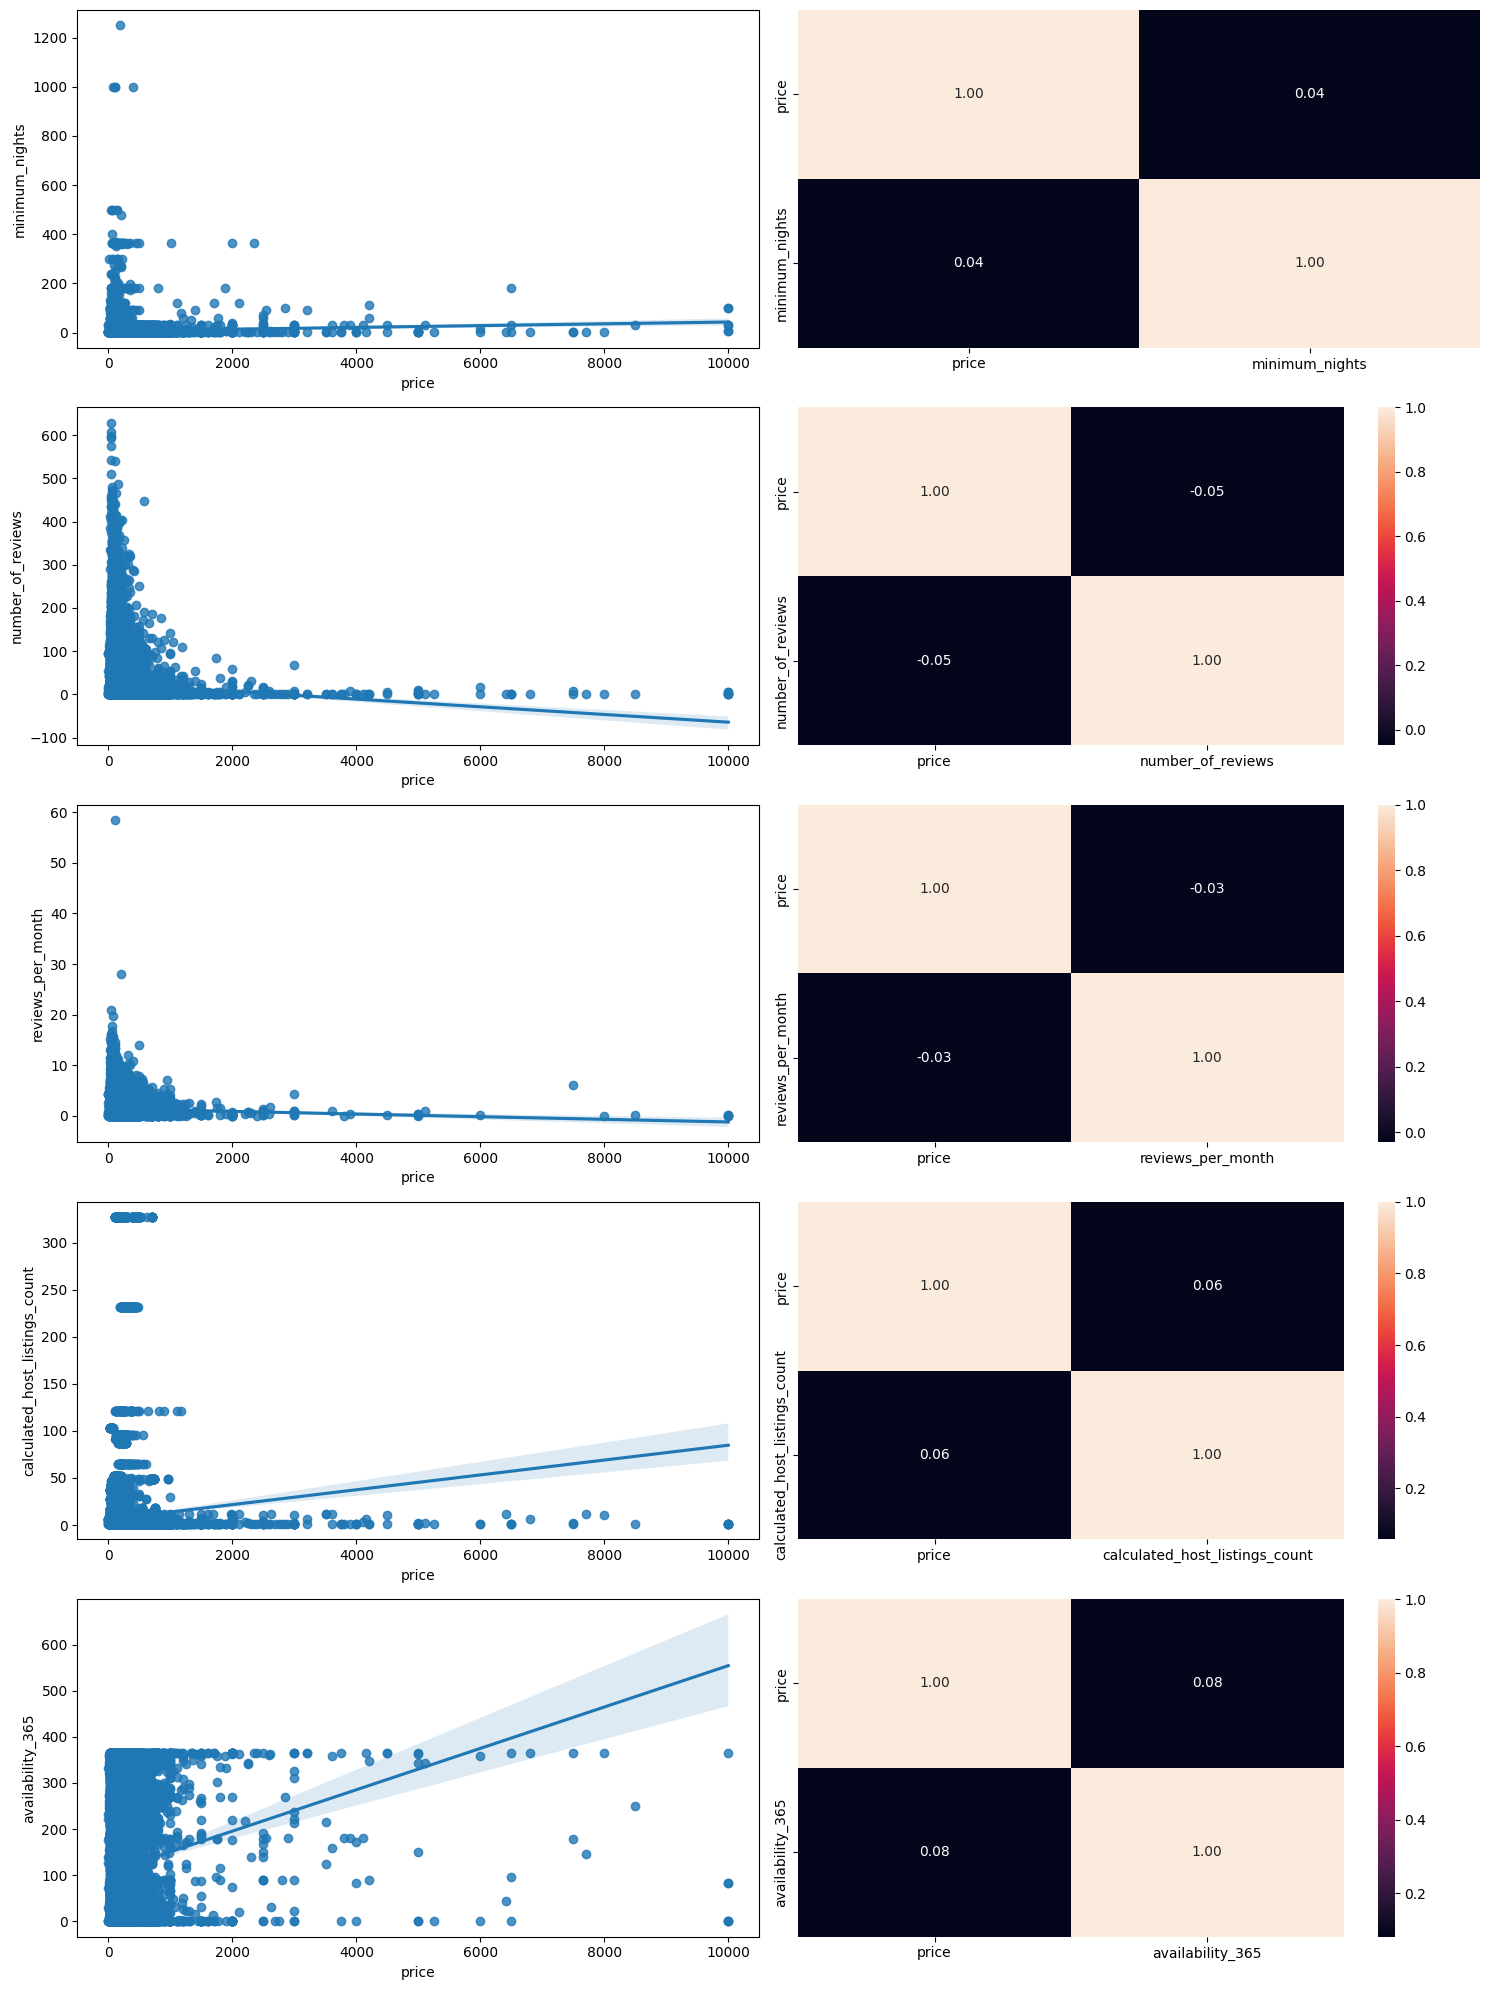

In [11]:
fig, axis = plt.subplots(5, 2, figsize = (15, 20))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "price", y = "minimum_nights")
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[0,1], cbar = False)
sns.regplot(ax = axis[1, 0], data = total_data, x = "price", y = "number_of_reviews")
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = total_data, x = "price", y = "reviews_per_month")
sns.heatmap(total_data[["price", "reviews_per_month"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])
sns.regplot(ax = axis[3, 0], data = total_data, x = "price", y = "calculated_host_listings_count")
sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[4, 0], data = total_data, x = "price", y = "availability_365")
sns.heatmap(total_data[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1])





# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

No se aprecian correlaciones significativas entre las variables numéricas y el precio.

ANÁLISIS DE VARIABLES CATEGÓRICAS

/home/vscode/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


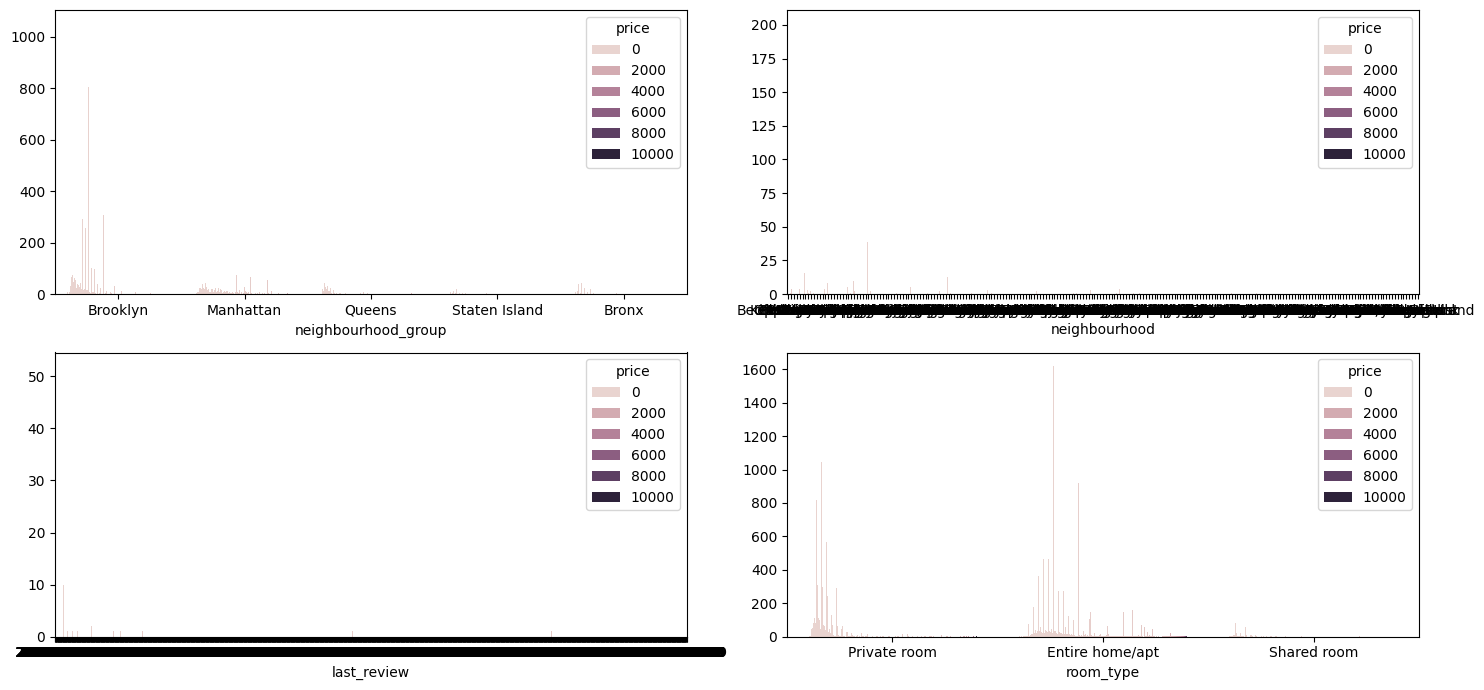

In [12]:
fig, axis = plt.subplots(2, 2, figsize = (15, 7))

sns.countplot(ax = axis[0, 0], data = total_data, x = "neighbourhood_group", hue = "price").set(ylabel=None)
sns.countplot(ax = axis[0, 1], data = total_data, x = "neighbourhood", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[1, 1], data = total_data, x = "room_type", hue = "price").set(ylabel = None)
sns.countplot(ax = axis[1, 0], data = total_data, x = "last_review", hue = "price").set(ylabel=None)


plt.tight_layout()


plt.show()

Apreciamos que el precio de los alquileres se ve influenciado por la ubicación de la oferta así como la tipología de de unidad habitacional.
En cambio los comentarios no parecen tener una incidencia notable sobre el precio de la oferta.

ANÁLISIS DE PRECIO CON VARIOS PREDICTORES

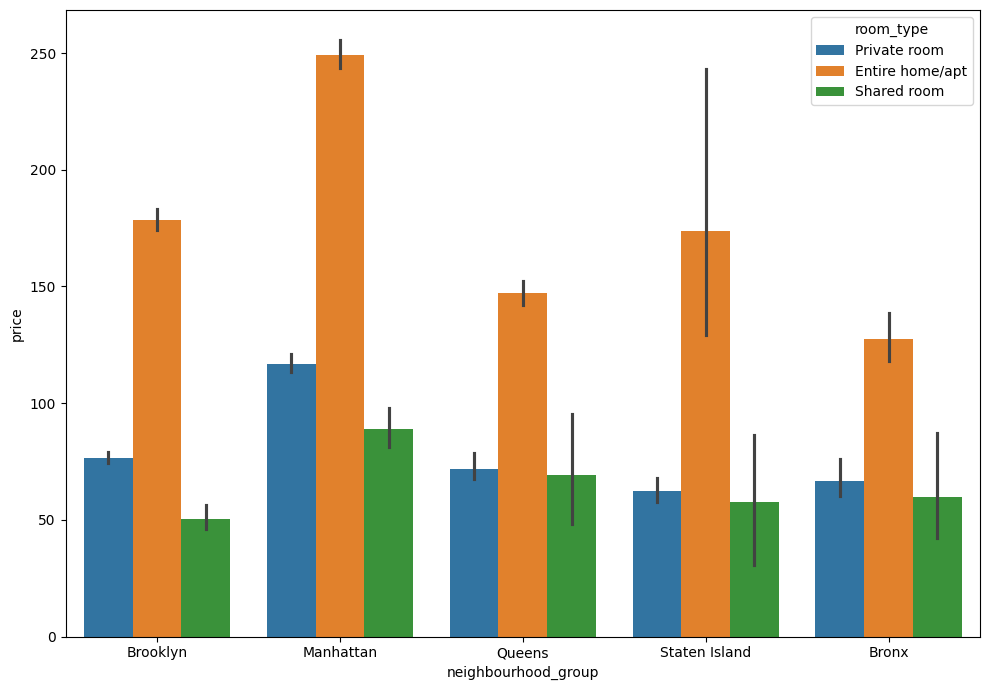

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
sns.barplot(data = total_data, x = "neighbourhood_group", y = "price", hue = "room_type")


plt.tight_layout()

plt.show()

Las habitaciones privadas y compartir habitación son las tipológías que más variación muestran según su ubicación, en cambio. el alquiler de viviendas mantiene unos rango de preciós más uniformes a excepción del barrio de Manhattan. Está última anotación nos confirma que la ubicación de la oferta es la variable que más influye en el precio.

Descartamos las variables de "neighbourhood" y "last_review" del análisis

5 # TRANSFORMACIÓN DE VARIABLES CATEGORICAS EN VALORES NUMÉRICOS NORMALIZADOS

In [14]:
import json

factorize = pd.factorize(total_data["neighbourhood_group"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_neighbourhood_group.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["neighbourhood_group_n"] = factorize[0]


factorize = pd.factorize(total_data["room_type"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("transform_room_type.json", "w") as f:
  json.dump(parsing_dict, f)
total_data["room_type_n"] = factorize[0]

In [15]:
# Lo que tenéis que hacer cuando os vengan los datos del MUNDO REAL.
# ¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡¡NUNCA SE UTILIZA PD.FACTORIZE!!!!!!!!!!!!!!!!!!!!!!!!!

# import json

# with open("transform_neighbourhood_group.json", "r") as f:
#    neighbourhood_dict = json.load(f)

# # A mano
# embarked_list = total_data["neighbourhood_group"]
# for index in range(len(embarked_list)):
#   embarked_list[index] = embarked_dict.get(embarked_list[index])
# total_data["neighbourhood_group"] = embarked_list

# # Más rápido y mejor
# total_data["neighbourhood_group_n"] = total_data["neighbourhood_group"].apply(lambda x: neighbourhood_dict.get(x))
# total_data["neighbourhood_group_n"] = total_data.apply(lambda x: neighbourhood_dict.get(x["neighbourhood_group"]), axis = 0)

6 # ANÁLISIS COMPLETO DE LA CORRELACIÓN DE TODAS LAS VARIABLES UNA VEZ NORMALIZADAS LAS VARIABLES CATEGORICAS

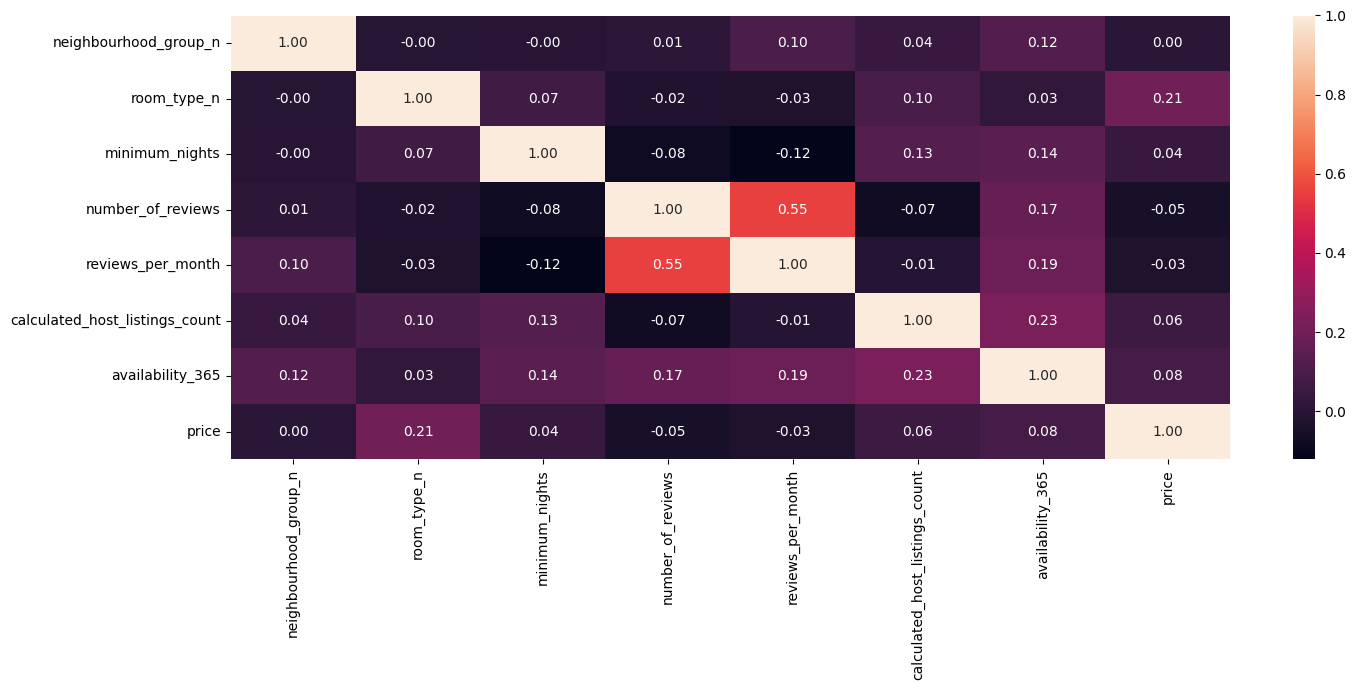

In [16]:
fig, axis = plt.subplots(figsize = (15, 7))
sns.heatmap(total_data[["neighbourhood_group_n", "room_type_n", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365", "price"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

La correlación de todas las variables nos indica los siguiente:
- El tipo de habitación es la variable que más determina el precio de la oferta y no la ubicación
- La ubicación tiene una correlación significativa sobre la disponibilidad, los barrios pueden caracterizarse por ser mayoritariamente residentes o mayoritariamente oferta orientada al turismo. 
  Ésto explica también la fuerte correlación entre la disponibilidad, las noches mínimas y el anfitrion, puesto que si no es residente de la vivienda que oferta la disponibilidad aumenta en consegcuencia así como su flexibilidad para ofertarla para períodos de menos duración.
- Nº de opiniones y opiniones por mes son dos variables que se pueden unir por su extracha vinculación.
- La correlación entre opiniones de los usuarios y oferta de mínimo de noches se relaciona con a mayor transito de usuarios mayor flujo de opiniones.



CONFIRMAMOS CORRELACIÓN ENTRE:
- UNIDAD HABITACIONAL CON EL PRECIO
- ANFITRIÓN CON DIPONIBILIDAD

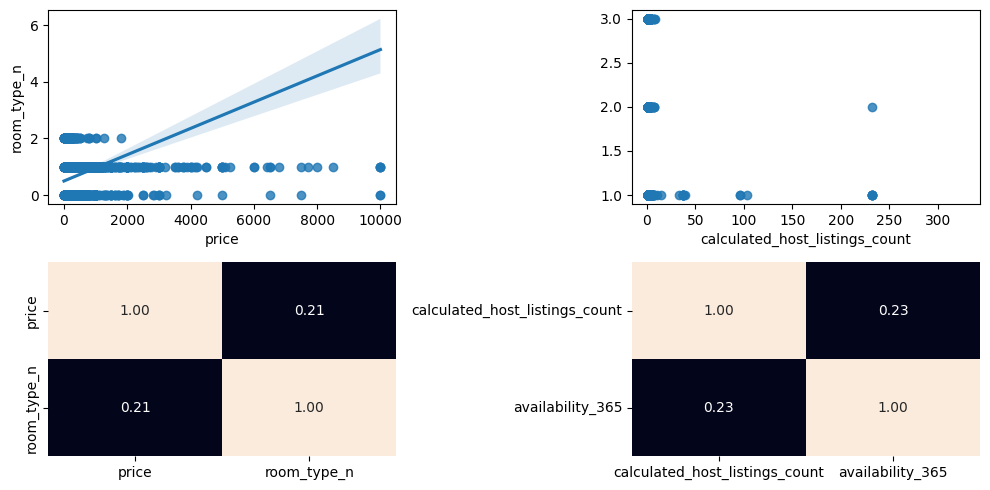

In [25]:
fig, axis = plt.subplots(2,2,figsize = (10, 5))

sns.regplot(ax = axis[0,0], data = total_data, x = "price", y = "room_type_n")
sns.heatmap(total_data[["price","room_type_n"]].corr(),annot=True,fmt=".2f",ax=axis[1,0],cbar=False)
sns.regplot(ax = axis[0,1], data = total_data, x = "calculated_host_listings_count", y = "availability_365").set(ylabel = None, ylim = (0.9, 3.1))
sns.heatmap(total_data[["calculated_host_listings_count","availability_365"]].corr(),annot=True,fmt=".2f",ax=axis[1,1],cbar=False)
plt.tight_layout()

plt.show()

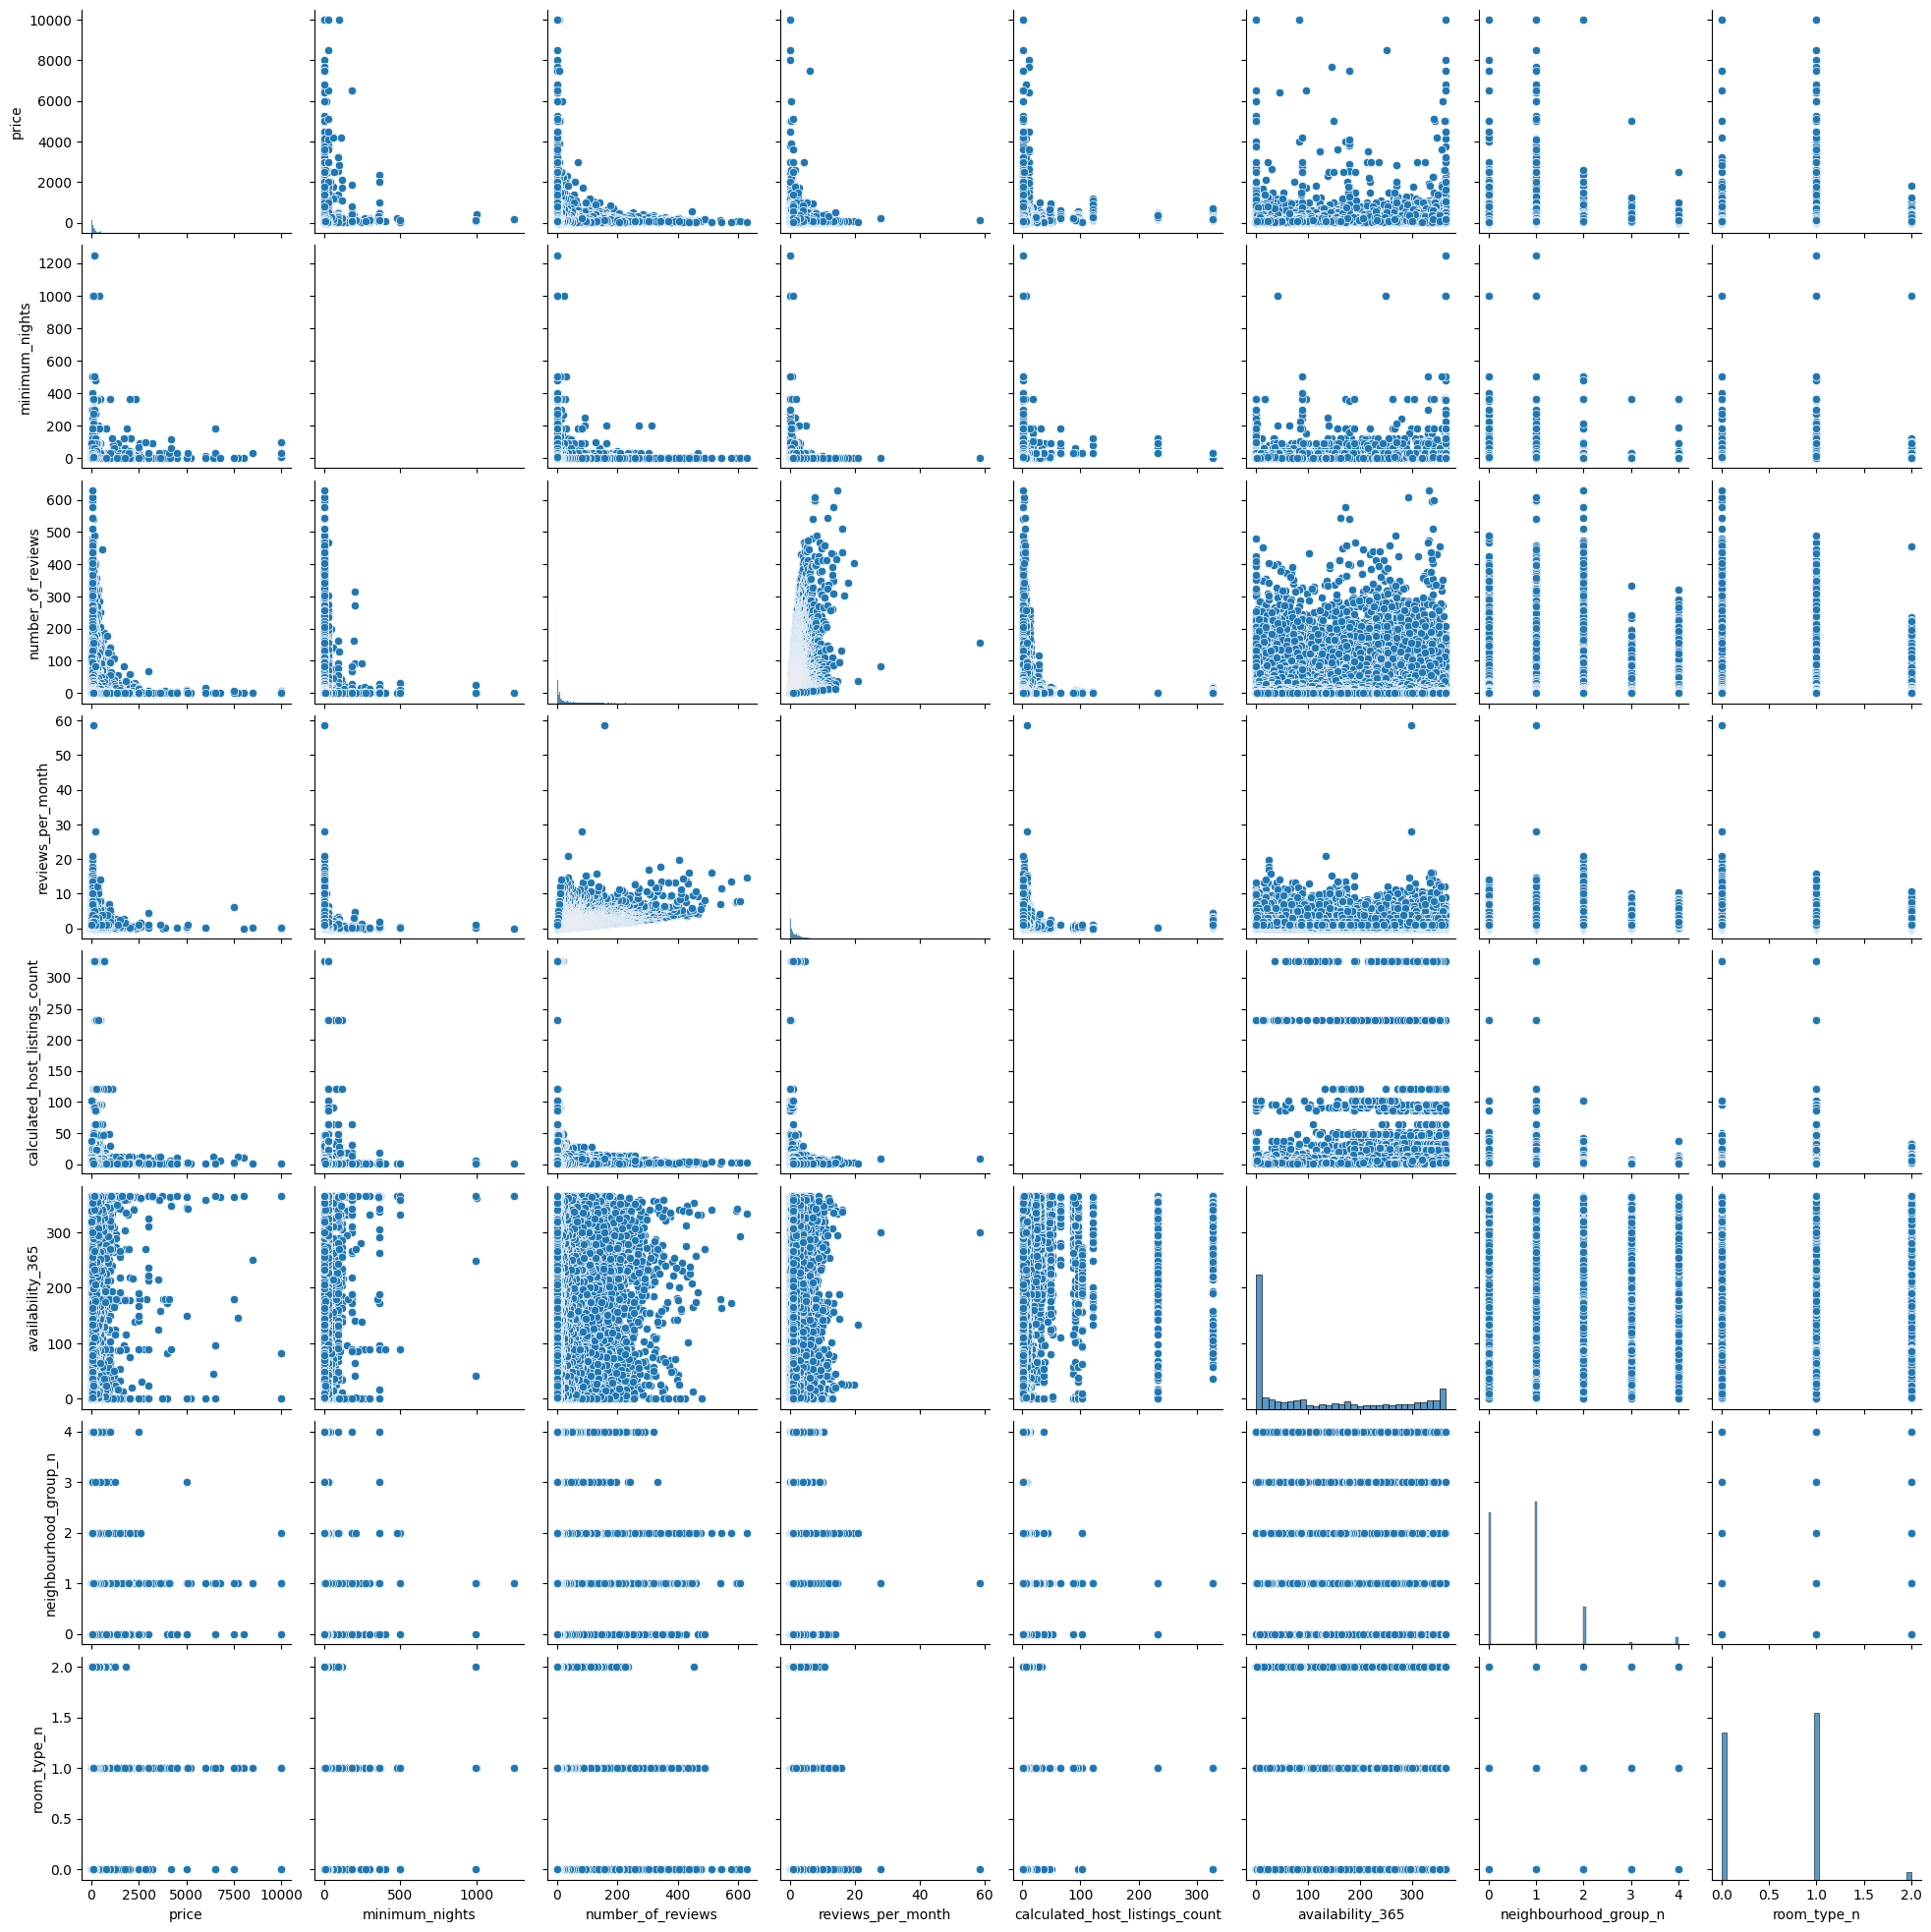

In [18]:
sns.pairplot(data = total_data)

FEATURE ENGINEERING // OUTLIER

In [19]:
total_stats =total_data.describe()
total_stats

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_n,room_type_n
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,0.786911,0.567113
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,0.844386,0.541249
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,0.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.000000,1.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.000000,1.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,4.000000,2.000000


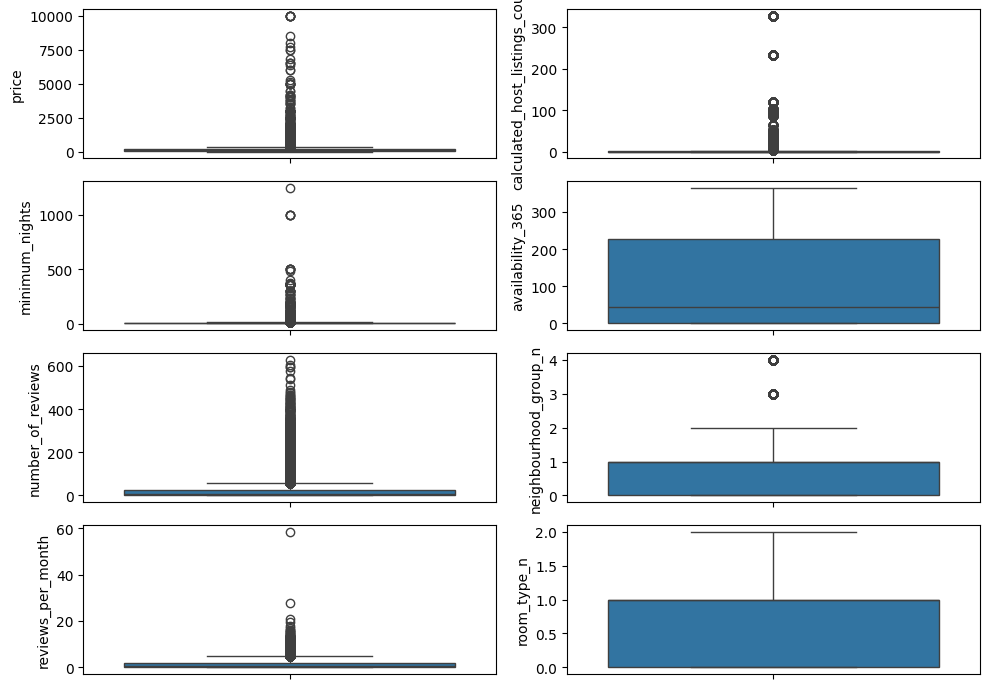

In [33]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

sns.boxplot(ax = axis[0, 0], data = total_data, y = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, y = "minimum_nights")
sns.boxplot(ax = axis[2, 0], data = total_data, y = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, y = "reviews_per_month")
sns.boxplot(ax = axis[0, 1], data = total_data, y = "calculated_host_listings_count")
sns.boxplot(ax = axis[1, 1], data = total_data, y = "availability_365")
sns.boxplot(ax = axis[2, 1], data = total_data, y = "neighbourhood_group_n")
sns.boxplot(ax = axis[3, 1], data = total_data, y = "room_type_n")

plt.tight_layout()

plt.show()

Variables afectados por outliers:"price","minimum_nights","number_of_reviews","reviews_per_month","calculated_host_listings_count"y"neighbourhood_group_n"

In [ ]:
neighbourhood_group_n_stats = total_data["neighbourhood_group_n"].describe()
calculated_host_listings_count_stats = total_data["calculated_host_listings_count"].describe()

print(f"{neighbourhood_group_n_stats} {calculated_host_listings_count_stats}")

count    48895.000000
mean         0.786911
std          0.844386
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          4.000000
Name: neighbourhood_group_n, dtype: float64 count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


In [45]:
neighbourhood_group_n_stats_iqr = neighbourhood_group_n_stats["75%"] - neighbourhood_group_n_stats["25%"]
upper_limit = neighbourhood_group_n_stats["75%"] + 1.5 * neighbourhood_group_n_stats_iqr
lower_limit = neighbourhood_group_n_stats["25%"] - 1.5 * neighbourhood_group_n_stats_iqr

print(f"Los límites superior e inferior para la búsqueda de outliers son {round(upper_limit, 2)} y {round(lower_limit, 2)}, con un rango intercuartílico de {round(neighbourhood_group_n_stats_iqr, 2)}")

Los límites superior e inferior para la búsqueda de outliers son 2.5 y -1.5, con un rango intercuartílico de 1.0
